# Εργασία Αριθμητικής Ανάλυσης
Κωνσταντίνος Βλαχάκος ΑΕΜ:10403

Μιχαήλ Χυτίρογλου AEM:10475


Runge-Kutta Method

Οι συνήθεις μέθοδοι προσέγγισης λύσεων διαφορικών εξισώσεων περιγράφονται από τις μεθόδους Runge-Kutta σε γενική μορφή ως:

$ {y_{i + 1}} = {y_i} + \sum\limits_{i = 0}^{r - 1} {{w_i}{k_i},} \sum\limits_{i = 0}^{r - 1} {{w_i} = 1}  $

Μία από αυτές είναι αυτή της 4ης τάξης (RK4) η οποία περιγράφεται ως εξής:
$
{k_0} = hf({x_i},{y_i})\\
{k_1} = hf({x_i} + \frac{1}{2}h,{y_i} + \frac{1}{2}{k_0})\\
{k_2} = hf({x_i} + \frac{1}{2}h,{y_i} + \frac{1}{2}{k_1})\\
{k_3} = hf({x_i} + h,{y_i} + {k_2})\\
{y_{i + 1}} = {y_i} + \frac{1}{6}({k_0} + 2{k_1} + 2{k_2} + {k_3})$

Για την προσέγγιση των λύσεων συστήματος διαφορικών εξισώσεων, γράφουμε το σύστημα με τη μορφή εξίσωσης διανυσματικών συναρτήσεων.
Έτσι για σύστημα n διαφορικών εξισώσεων μπορούμε να το γράψουμε με την εξής μορφή:

$
\left. \begin{array}{l}
{y_1}'(x) = f(x,{y_1},{y_2},...,{y_n}),{y_1}({x_0}) = {y_{1,0}}\\
{y_2}'(x) = f(x,{y_1},{y_2},...,{y_n}),{y_2}({x_0}) = {y_{2,0}}\\
...\\
{y_n}'(x) = f(x,{y_1},{y_2},...,{y_n}),{y_n}({x_0}) = {y_{n,0}}
\end{array} \right\} \Rightarrow {\bf{y}}'(x) = {\bf{f}}(x,{\bf{y}}(x)),{\bf{y}}({x_0}) = {{\bf{y}}_0} $
Έτσι έχουμε (για α και β τυχαίες τιμές):

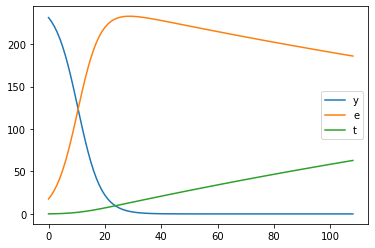

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy.optimize as scp

# RK-4 method

#y1=Y,y2=E,y3=T
#xn=final x moment
#n how many points
#h step size
#a,b parameters

#Ιnputs 
x0 = 0
y01 = 235
y02 = 14
y03 = 0
xn = 109
step = 109


def rk4(x0,y01,y02,y03,xn,n,a,b):
    f = lambda x,y1,y2,y3: -a*y1*y2   #y'
    g = lambda x,y1,y2,y3: a*y1*y2-b*y2 #e'
    p = lambda x,y1,y2,y3: b*y2 #t'
    xparam=[0 for i in range (n)]
    yparam1=[0 for i in range(n)]
    yparam2=[0 for i in range (n)]
    yparam3=[0 for i in range (n)]
    # Calculating step size
    h = (xn-x0)/n

    for i in range(n):
        k11 = h * (f(x0,y01,y02,y03))
        k21 = h * (g(x0,y01,y02,y03))
        k31 = h * (p(x0,y01,y02,y03))
        k12 = h * (f((x0+h/2), (y01+k11/2),(y02+k21/2),(y03+k31/2)))
        k22 = h * (g((x0+h/2), (y01+k11/2),(y02+k21/2),(y03+k31/2)))
        k32 = h * (p((x0+h/2), (y01+k11/2),(y02+k21/2),(y03+k31/2)))
        k13 = h * (f((x0+h/2), (y01+k12/2),(y02+k22/2),(y03+k32/2)))
        k23 = h * (g((x0+h/2), (y01+k12/2),(y02+k22/2),(y03+k32/2)))
        k33 = h * (p((x0+h/2), (y01+k12/2),(y02+k22/2),(y03+k32/2)))
        k14 = h * (f((x0+h), (y01+k13),(y02+k23),(y03+k33)))
        k24 = h * (g((x0+h), (y01+k13),(y02+k23),(y03+k33)))
        k34 = h * (p((x0+h), (y01+k13),(y02+k23),(y03+33)))
        k1 = (k11+2*k12+2*k13+k14)/6
        k2 = (k21+2*k22+2*k23+k24)/6
        k3 = (k31+2*k32+2*k33+k34)/6
        yn1 = y01 + k1
        yn2= y02 + k2
        yn3= y03 + k3
        xparam[i]=x0
        yparam1[i]=yn1
        yparam2[i]=yn2
        yparam3[i]=yn3
        y01 = yn1
        y02= yn2
        y03 = yn3
        x0 = x0+h
    return [xparam,yparam1,yparam2,yparam3]
xparam=rk4(x0,y01,y02,y03,xn,step,1/1000,3/1000)[0]
yparam1=rk4(x0,y01,y02,y03,xn,step,1/1000,3/1000)[1]
yparam2=rk4(x0,y01,y02,y03,xn,step,1/1000,3/1000)[2]
yparam3=rk4(x0,y01,y02,y03,xn,step,1/1000,3/1000)[3]
plt.plot(xparam,yparam1,label='y')
plt.plot(xparam,yparam2,label='e')
plt.plot(xparam,yparam3,label='t')
plt.legend()
plt.show()

Όπου x0,y01,y02,y03 οι αρχικές συνθήκες των συναρτήσεων (για x0=0: y01=235,y02=14,y03=0) και η συνάρτηση επιστρέφει μια λίστα με τις λίστες των προσεγγίσεων κατά x, Y(x), E(x), T(x). Για τις ανάγκες του μοντέλου, κρίθηκε σημαντικό το βήμα να είναι ανά μία μέρα ενώ οι συνολικές μέρες να φτάνουν αυτές των δεδομένων (109). Συνεπώς xn=step=109. Έπειτα για να προσαρμόσουμε το μοντέλο στα δεδομένα, τα εισάγουμε σε μορφή λίστας:

[0, 16, 31, 47, 62, 78, 109] [235, 201, 153, 121, 108, 97, 83] [14, 22, 29, 21, 8, 8, 0]


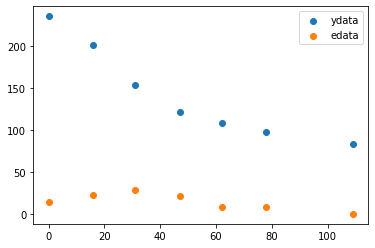

In [3]:
xdata=[0,16,31,47,62,78,109]
ydatay=[235,201,153,121,108,97,83]
ydatae=[14,22,29,21,8,8,0]
print(xdata,ydatay,ydatae)
plt.scatter(xdata,ydatay,label='ydata')
plt.scatter(xdata,ydatae,label='edata')
plt.legend()
plt.show()

Για την προσαρμογή των παραμέτρων χρησιμοποιούμε τη συνάρτηση least_squares(fun,x0) της βιβλιοθήκης scipy.optimize. H συνάρτηση least_squares(fun,x0) βρίσκει για ένα εύρος τιμών γύρω από τη x0 το ελάχιστο τετραγωνικό σφάλμα, επιστρέφοντας το x για το οποίο έχουμε την ελαχιστοποίηση. Η συνάρτηση αυτή δέχεται σαν όρισμα μια συνάρτηση fun η οποία εκφράζει το συνολικό σφάλμα της προσέγγισης έναντι των δεδομένων.
$|E(\widehat {\bf{p}})| = |{\bf{p}} - \widehat {\bf{p}}| = \sqrt {\sum\limits_{i = 0}^n {{{({p_i} - \widehat {{p_i}})}^2}} } $
Η συνάρτηση fun πρέπει να επιστρέφει μία μονοδιάστατη λίστα ή έναν μονοδιάστατο πίνακα με όλα τα σφάλματα για τα συγκεκριμένα δεδομένα που έχει να συγκρίνει (6) και να δέχεται σαν όρισμα τις παραμέτρους σε μορφή πίνακα x. Για την συγκεκριμένη ανάγκη, υλοποιούμε τη συνάρτηση errorfun(x):

In [16]:
def errorfun(x):
    errlist=[]
    for i in range (len(xdata)-1):
        errlist.append(m.sqrt((ydatay[i]-rk4(x0,y01,y02,y03,xn,step,x[0],x[1])[1][xdata[i]])**2+(ydatae[i]-rk4(x0,y01,y02,y03,xn,step,x[0],x[1])[2][xdata[i]])**2))
    return errlist
x=[1/1000,2/1000]
errorfun(x)

[5.172889324942324,
 230.0983351484202,
 257.5873848780102,
 242.80125990523518,
 242.13784086991686,
 230.99583747359551]

Έπειτα δίνουμε στη συνάρτηση least_squares(fun,x0) μια μαντεψιά για τις παραμέτρους (x0 πίνακας) και με trial and error προσπαθούμε να φτάσουμε όσο περισσότερο μπορούμε στα δεδομένα. Ύστερα και από έρευνα για το μοντέλο SIR, η τιμή που δώσαμε στο x0=(6/10000,95/1000). Τότε εφαρμόζοντας τη least_squares(fun,x0) παίρνουμε σαν output.

In [25]:
x=[6/10000,95/1000]
result=scp.least_squares(errorfun, x,verbose=0,method='trf')
print(result)

 active_mask: array([0., 0.])
        cost: 53.13852574209166
         fun: array([2.08848903, 7.55425707, 3.5126865 , 2.62879576, 4.95759021,
       1.01055965])
        grad: array([1364.34889334,  949.53443505])
         jac: array([[ 4.39096380e+03, -5.14331135e+00],
       [ 1.45156215e+05, -4.06579749e+02],
       [-1.89982923e+05,  9.43059639e+02],
       [-3.62782959e+05,  1.64492118e+03],
       [ 1.17527433e+05, -8.41171777e+02],
       [-6.52842169e+04,  5.59130184e+02]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 29
        njev: 16
  optimality: 1364.348893338989
      status: 3
     success: True
           x: array([0.00059803, 0.0980836 ])


Βλέποντας την τελευταία γραμμή του output, εμφανίζονται οι βελτιστοποιημένες παράμετροι του α και β. Εφαρμόζοντας αυτές τις παραμέτρους στην rk4 παίρνουμε το βέλτιστο μοντέλο για τα συγκεκριμένα δεδομένα.

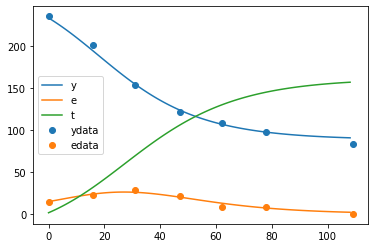

In [26]:
xparam=rk4(x0,y01,y02,y03,xn,step,0.00059803, 0.0980836)[0]
yparam1=rk4(x0,y01,y02,y03,xn,step,0.00059803, 0.0980836)[1]
yparam2=rk4(x0,y01,y02,y03,xn,step,0.00059803, 0.0980836)[2]
yparam3=rk4(x0,y01,y02,y03,xn,step,0.00059803, 0.0980836)[3]
plt.plot(xparam,yparam1,label='y')
plt.plot(xparam,yparam2,label='e')
plt.plot(xparam,yparam3,label='t')
plt.scatter(xdata,ydatay,label='ydata')
plt.scatter(xdata,ydatae,label='edata')
plt.legend()

plt.legend()
plt.show()

Ανακεφαλαιώνοντας, με δεδομένα το σύστημα των διαφορικών εξισώσεων και τους πίνακες τιμών ακολούθησαμε τα εξής βήματα για την εύρεση του πιο κατάλληλου μοντέλου:

1)Διακριτοποίηση του συστήματος των διαφορικών εξισώσεων με τη μέθοδο Runge-Kutta 4th Order

2)Εισαγωγή του δείγματος των δεδομένων

3)Υλοποίηση συνάρτησης εκτίμησης σφάλματος

4)Βελτιστοποίηση των παραμέτρων μέσα από την εύρεση του ελάχιστου τετραγωνικού σφάλματος (scipy.optimize.least_squares(fun,x0))

Το παρόν μοντέλο σίγουρα επιδέχεται βελτιώσεις καθώς για διαφορετικές αριθμητικές μεθόδους/ορίσματα που μπορεί να ακολουθήσει η least_squares θα έχουμε και διαφορετικές προσεγγίσεις των παραμέτρων (arguments: method, loss ...). Σε κάθε περίπτωση η ανάγκη και η αιτία ερμηνείας του δείγματος των δεδομένων είναι αυτή που θα μας δείξει ποια μέθοδος είναι η πιο κατάλληλη.